# Training Models

## Linear Regression
### The Normal Equation

$\mathbf{\hat\theta}=(\mathbf{X^\intercal} \mathbf{X})^{-1} \cdot \mathbf{X^\intercal} \cdot \mathbf{y}$

Directly calculating the parameter vector $\hat\theta$ that minimizes the Mean Squared Error for $\mathbf{y}=\mathbf{\theta}\cdot\mathbf{X}$.

In [60]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [61]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance for the constant term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [62]:
theta_best # without randomness we would expect column vector [[4],[3]]

array([[3.91656809],
       [3.07537878]])

In [63]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance for the constant term
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.91656809],
       [10.06732565]])

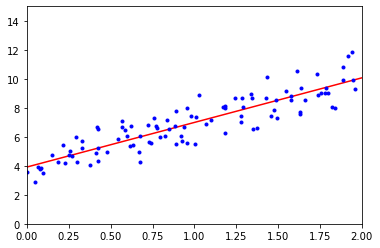

In [64]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [65]:
# Linear Regression with Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91656809]), array([[3.07537878]]))

In [66]:
lin_reg.predict(X_new)

array([[ 3.91656809],
       [10.06732565]])

In [67]:
# Scikit-Learn's LinearRegression is based on scipy.linalg.lstsq() ("")
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.91656809],
       [3.07537878]])

In [68]:
# Which in turn makes use of the pseudoinverse (Moore-Penrose inverse), computed using Singular Value Decomposition (SVD).
# This is more efficient than the actual normal equation and handles the case where X^T*X is non-invertible.
np.linalg.pinv(X_b).dot(y)

array([[3.91656809],
       [3.07537878]])

### Computational Complexity

Computing the inverse of $\mathbf{X^\intercal} \mathbf{X}$ is typically $O(n^{2.4})$ to $O(n^3)$ where $n$ is the number of features, depending on the implementation. The SVD approach is closer to $O(n^2)$. Both scale linearly with the size of the training set. Additionally, with large datasets, storing X in memory becomes impossible.

## Gradient Descent
### Batch Gradient Descent

$\mathbf{\nabla}=\frac{2}{m}\mathbf{X^\intercal}(\mathbf{X\theta-y})$

$\mathbf{\theta_{i+1}}=\mathbf{\theta_i}-\eta\mathbf{\nabla}$ 

Recalulate $\mathbf{\theta}$ until it converges. $\eta$ is the **learning rate** - too low and training will take more iterations than needed, too high and $\mathbf{\theta}$ could start to diverge instead of converging to the solution.

For the linear case, as long as $\eta$ is not too large, this will always converge to the correct solution (because the mean squared error cost function for linear regression is a *convex function*). For more complex functions, convergence to the global minimum (the true solution) is not guaranteed, Gradient Descent could converge on a local minimum instead of the true minimum.

Notice that the entire training set $\mathbf{X}$ is used in each calculation when using Batch Gradient Descent.

In [69]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [70]:
theta # same result as using the Normal Equation

array([[3.91656809],
       [3.07537878]])

### Stochiastic Gradient Descent

Instead of using the entire training set for each step, a single value is chosen randomly (hence, stochiastic). The learning rate is reduced over time according to a **learning schedule**.

This is much faster than Batch Gradient Descent and can solve the problem of getting stuck in local minima, however it does not converge to the global minimum - it will just get close and bounce around close to the optimum value.

In [71]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [72]:
theta # close but not quite the same as we got from previous methods.

array([[3.92773364],
       [3.07856786]])

In [73]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [74]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86516353]), array([3.06264453]))

### Mini-batch Gradient Descent

Like SGD but with a small random batch instead of a single value.

|Algorithm|Large m|Out-of-core-support|Large n|Hyperparams|Scaling required|Scikit-Learn|
|---------|-------|-------------------|-------|-----------|----------------|------------|
|Normal Equation|Fast|No|Slow|0|No|N/A|
|SVD|Fast|No|Slow|0|No|LinearRegression|
|Batch GD|Slow|No|Fast|2|Yes|SGDReressor|
|Stochiastic GD|Fast|No|Fast|>=2|Yes|SGDReressor|
|Mini-batch GD|Fast|No|Fast|>=2|Yes|SGDReressor|

*m = # of training instances, n # of features


### Polynomial Regression

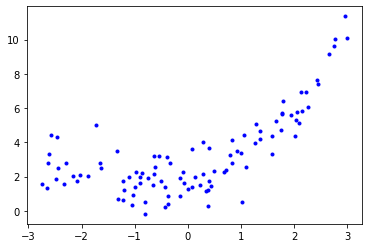

In [75]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.show()

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.38574834])

In [77]:
X_poly[0] # feature and the square of the feature.

array([0.38574834, 0.14880178])

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.83857094]), array([[0.97073308, 0.56648263]]))

### Learning Curves
High-degree Polynomial Regression can severely overfit the training data.

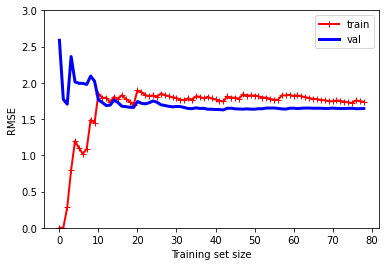

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.ylim(0, 3)
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

This is typical of underfitting - the RMSE reaches a high plateau for both the training and test set.

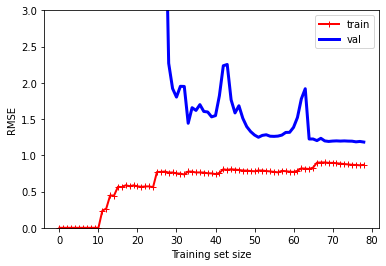

In [80]:
from sklearn.pipeline import Pipeline

polynomial_regression_10_degree = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(polynomial_regression_10_degree, X, y)

Using a 10th degree polynomial to fit data that is actually quadratic will result in overfitting. This is not radically different from the underfitting case, however note that the overall RMSE is lower and the training error remains lower than the validation error.

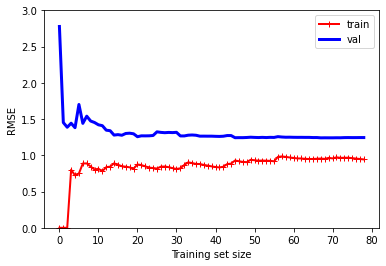

In [81]:
polynomial_regression_quadratic = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(polynomial_regression_quadratic, X, y)

The Bias/Variance Trade-Off

Bias: The part of the generalization error caused by incorrect assumptions (such as assuming quadratic data is actually linear). Likely to underfit.

Variance: The part of the error caused by excessive sensitivity to small variations in training data. A model with many degrees of freedom will likely have high variance and overfit the training training data.

Inherent Error: Caused by the noisiness of the data itself.

Incresing the complexity of a model increases its variance and reduces its bias, and vice versa.

## Regularized Linear Models

### Ridge Regression (Tikhonov Regression)

Linear model regularization happens by constraining the weights of the model. A *regularization term* is added to the cost function during training (and **only** during training).

$J(\mathbf{\theta})=MSE(\mathbf{\theta})+\alpha\frac{1}{2}\Sigma^n_{i=1}\theta^2_i$

Note that the bias term ($\theta_0$) is not regularized. The parameter $\alpha$ affects the level of regularization - 0 is none, increasing $\alpha$ - flatter predictions (lower variance).

You can also think of this as equivalent to half the square of the $\ell_2$ norm of the weight vector.

It is important to scale your data before performing Ridge Regression since it is scale-sensitive. This is generally true for most regularization methods.



In [82]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") # a closed-form Ridge Regression solution
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.74004286]])

In [83]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel()) # y.ravel() flattens the array since a 1d array is expected, not a column vector. e.g [1 2 3] not [[1] [2] [3]]
sgd_reg.predict([[1.5]])


array([4.73011265])

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression

$J(\mathbf{\theta})=MSE(\mathbf{\theta})+\alpha\frac{1}{2}\Sigma^n_{i=1}|\theta_i|$

$\ell_1$ instead of Ridge Regression's $\ell_2$

Tends to set the weights of least important features to 0.

In [84]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.68591328])

In [85]:
sgd_lasso_reg = SGDRegressor(penalty="l1")
sgd_lasso_reg.fit(X, y.ravel())
sgd_lasso_reg.predict([[1.5]])

array([4.71569325])

### Elastic Net

Literally a mix of Ridge and Lasso Regression with mix ratio $r$ ($r=1$, Lasso; $r=0$, Ridge; $r=0.5$, equal mix of both).

$J(\mathbf{\theta})=MSE(\mathbf{\theta})+r\alpha\frac{1}{2}\Sigma^n_{i=1}|\theta_i|+\frac{1-r}{2}\alpha\Sigma^n_{i=1}\theta^2_i$

Generally Ridge Regression is a good default option, but if only a few features are likely to be useful, Lasso or Elastic Net will reduce non-useful feature weights to 0. Elastic Net is generally preferred over Lasso when the number of features is greateer than the number of training instances or when several features are correlated. It is generally not a good idea to use Linear Regression with no regularization at all.


In [86]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.68588871])

### Early Stopping

For iterative methods like gradient descent, validation error will reduce over many iterations but can start increasing again as overfitting happens. Sometimes it's okay to just stop training early, using the model state at the iteration before validation error started increasing.

In [87]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if (val_error < minimum_val_error):
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression
Using linear regression to estimate probabilities, e.g. classification
### Estimating Probabilities
$\hat{p}=h_\mathbf{\theta}(\mathbf{x})=\sigma(\mathbf{x^\intercal\theta})$ where $\sigma$ is the logistic function, $\sigma(t)=\frac{1}{1+e^{-t}}$

$\hat{y}=\begin{cases}0\text{ if }\hat{p}\lt0.5\\ 1\text{ if }\hat{p} \geq 0.5\end{cases}$
### Training and Cost Function
Cost function (single instance) = $c(\mathbf{\theta})=\begin{cases}-\text{log}(\hat{p})\text{   if }y=1\\-\text{log}(1-\hat{p})\text{   if }y=0\end{cases}$

Cost function (entire dataset) = $J(\mathbf{\theta})=-\frac{1}{m}\Sigma^m_{i=1}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$

There is no closed-form solution for $\mathbf{\theta}$ so only iterative approaches like Gradient Descent are possible for logistic regression.
### Decision Boundaries


In [88]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [89]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int64) # 1 if Iris virginica, else 0

In [90]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

(0.0, 3.0, -0.02, 1.02)

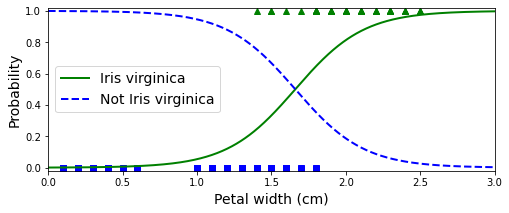

In [91]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

In [92]:
# Decision boundary around 1.6 cm.
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

Separate parameter vector for each class.

$\hat{y} = \text{argmax} ((\mathbf{\theta}^{(k)})^{\intercal}\mathbf{x})$

In [93]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=16)
softmax_reg.fit(X,y)
softmax_reg.predict([[5, 2]])

array([2])

In [94]:
softmax_reg.predict_proba([[5, 2]])

array([[1.46319710e-07, 4.22199059e-02, 9.57779948e-01]])